In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib as mpl


import seaborn as sns
%matplotlib inline
import time
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score


In [3]:
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


# Plot style
plt.style.use("seaborn-whitegrid")

In [5]:
# Imports


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_boston


In [6]:
! from prophet import Prophet

'from' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!/usr/bin/env python


The system cannot find the path specified.


In [8]:
#import fbprophet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from fbprophet import Prohet

In [9]:
import os
from datetime import datetime
import plotly.express as px
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [10]:
df = pd.read_csv("https://datasource.kapsarc.org/explore/dataset/saudi-arabia-coronavirus-disease-covid-19-situation/download/?format=csv&timezone=America/New_York&lang=en&use_labels_for_header=true&csv_separator=%3B", sep=";", encoding = 'unicode_escape')
df
#parse_dates=['Date'],index_col=['Date']

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Daily,Cases,2020-03-12,NaN,Al Qatif,Eastern Region,3
1,Daily,Cases,2020-03-13,NaN,Makkah Al Mukarramah,Makkah Al Mukarramah,26
2,Daily,Cases,2020-03-14,NaN,Al Hufuf,Eastern Region,1
3,Daily,Cases,2020-03-14,NaN,Al Qatif,Eastern Region,3
4,Daily,Cases,2020-03-15,International flights suspension for 14 days,Jeddah,Makkah Al Mukarramah,2
...,...,...,...,...,...,...,...
533399,Cumulative,Tested,2022-01-10,NaN,Total,Total,34567571
533400,Cumulative,Tested,2022-01-12,NaN,Total,Total,34885540
533401,Cumulative,Tested,2022-01-13,NaN,Total,Total,35050746
533402,Cumulative,Tested,2022-01-14,NaN,Total,Total,35198422


 ##  Cleaning The Data


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533404 entries, 0 to 533403
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Daily / Cumulative  533404 non-null  object
 1   Indicator           533404 non-null  object
 2   Date                533404 non-null  object
 3   Event               1900 non-null    object
 4   City                533404 non-null  object
 5   Region              533404 non-null  object
 6   Cases (person)      533404 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 28.5+ MB


In [13]:
df.isnull().sum()

Daily / Cumulative         0
Indicator                  0
Date                       0
Event                 531504
City                       0
Region                     0
Cases (person)             0
dtype: int64

In [14]:
dff=df.drop('Event',axis=1)

In [15]:
dff = dff.dropna(axis=0)
dff

,Daily / Cumulative,Indicator,Date,City,Region,Cases (person)
0,Daily,Cases,2020-03-12,Al Qatif,Eastern Region,3
1,Daily,Cases,2020-03-13,Makkah Al Mukarramah,Makkah Al Mukarramah,26
2,Daily,Cases,2020-03-14,Al Hufuf,Eastern Region,1
3,Daily,Cases,2020-03-14,Al Qatif,Eastern Region,3
4,Daily,Cases,2020-03-15,Jeddah,Makkah Al Mukarramah,2
...,...,...,...,...,...,...
533399,Cumulative,Tested,2022-01-10,Total,Total,34567571
533400,Cumulative,Tested,2022-01-12,Total,Total,34885540
533401,Cumulative,Tested,2022-01-13,Total,Total,35050746
533402,Cumulative,Tested,2022-01-14,Total,Total,35198422


In [16]:
dff.isnull().sum()

Daily / Cumulative    0
Indicator             0
Date                  0
City                  0
Region                0
Cases (person)        0
dtype: int64

In [17]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533404 entries, 0 to 533403
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Daily / Cumulative  533404 non-null  object
 1   Indicator           533404 non-null  object
 2   Date                533404 non-null  object
 3   City                533404 non-null  object
 4   Region              533404 non-null  object
 5   Cases (person)      533404 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 28.5+ MB


In [18]:
# What is our baseline model?

dff["Indicator"].value_counts(normalize=True)

Cases          0.335440
Recoveries     0.325489
Active         0.224147
Mortalities    0.111087
Tested         0.002636
Critical       0.001202
Name: Indicator, dtype: float64

In [19]:
dfYear = dff
dfYear['Date'] = pd.to_datetime(dff['Date'])
dfYear['Year'], dfYear['Month'] = dfYear['Date'].dt.year, dfYear['Date'].dt.month
dfYear

,Daily / Cumulative,Indicator,Date,City,Region,Cases (person),Year,Month
0,Daily,Cases,2020-03-12,Al Qatif,Eastern Region,3,2020,3
1,Daily,Cases,2020-03-13,Makkah Al Mukarramah,Makkah Al Mukarramah,26,2020,3
2,Daily,Cases,2020-03-14,Al Hufuf,Eastern Region,1,2020,3
3,Daily,Cases,2020-03-14,Al Qatif,Eastern Region,3,2020,3
4,Daily,Cases,2020-03-15,Jeddah,Makkah Al Mukarramah,2,2020,3
...,...,...,...,...,...,...,...,...
533399,Cumulative,Tested,2022-01-10,Total,Total,34567571,2022,1
533400,Cumulative,Tested,2022-01-12,Total,Total,34885540,2022,1
533401,Cumulative,Tested,2022-01-13,Total,Total,35050746,2022,1
533402,Cumulative,Tested,2022-01-14,Total,Total,35198422,2022,1


In [20]:
dfYear = dfYear.rename(columns={'Daily / Cumulative': 'Daily_Cumulative','Cases (person)':'Cases'})

In [21]:
dfYear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533404 entries, 0 to 533403
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Daily_Cumulative  533404 non-null  object        
 1   Indicator         533404 non-null  object        
 2   Date              533404 non-null  datetime64[ns]
 3   City              533404 non-null  object        
 4   Region            533404 non-null  object        
 5   Cases             533404 non-null  int64         
 6   Year              533404 non-null  int64         
 7   Month             533404 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 36.6+ MB


In [22]:
dfYear['Indicator'].value_counts()

Cases          178925
Recoveries     173617
Active         119561
Mortalities     59254
Tested           1406
Critical          641
Name: Indicator, dtype: int64

In [23]:
dfYear['Region'].value_counts()

Ar Riyad                    87936
Eastern Region              73135
Makkah Al Mukarramah        68334
Aseer                       64816
Jazan                       48854
Al Qaseem                   38677
Al Madinah Al Munawwarah    27304
Al Bahah                    22657
Tabuk                       22031
Hail                        21602
Al Jawf                     18012
Najran                      17715
Northern Borders            15437
Total                        6894
Name: Region, dtype: int64

                           DROP Totals from Region


In [24]:
dfYear.drop(dfYear[dfYear['Region'] == 'Total'].index, inplace = True)

In [25]:
dfYear['Region'].value_counts()

Ar Riyad                    87936
Eastern Region              73135
Makkah Al Mukarramah        68334
Aseer                       64816
Jazan                       48854
Al Qaseem                   38677
Al Madinah Al Munawwarah    27304
Al Bahah                    22657
Tabuk                       22031
Hail                        21602
Al Jawf                     18012
Najran                      17715
Northern Borders            15437
Name: Region, dtype: int64

In [26]:
dfYear['Indicator'].value_counts()

Cases          177521
Recoveries     172237
Active         118858
Mortalities     57894
Name: Indicator, dtype: int64

### What is our baseline model?


In [27]:
dfYear["Indicator"].value_counts(normalize=True)

Cases          0.337165
Recoveries     0.327130
Active         0.225747
Mortalities    0.109958
Name: Indicator, dtype: float64

In [28]:
dfYear['Daily_Cumulative'].value_counts(normalize=True)

Cumulative    0.798435
Daily         0.201565
Name: Daily_Cumulative, dtype: float64

In [29]:
dfYear["Daily_Cumulative"].value_counts(normalize=True)

Cumulative    0.798435
Daily         0.201565
Name: Daily_Cumulative, dtype: float64

In [30]:
dfYear["Region"].value_counts(normalize=True)

Ar Riyad                    0.167017
Eastern Region              0.138905
Makkah Al Mukarramah        0.129787
Aseer                       0.123105
Jazan                       0.092788
Al Qaseem                   0.073459
Al Madinah Al Munawwarah    0.051858
Al Bahah                    0.043032
Tabuk                       0.041843
Hail                        0.041029
Al Jawf                     0.034210
Najran                      0.033646
Northern Borders            0.029319
Name: Region, dtype: float64

##    Splitting the Daily_Cumulative Column

In [31]:
df_Cumulative = dfYear.query('Daily_Cumulative == "Cumulative"')
df_Cumulative

,Daily_Cumulative,Indicator,Date,City,Region,Cases,Year,Month
10629,Cumulative,Cases,2020-03-02,Al Qatif,Eastern Region,1,2020,3
10630,Cumulative,Cases,2020-03-13,Makkah Al Mukarramah,Makkah Al Mukarramah,48,2020,3
10631,Cumulative,Cases,2020-03-15,AdÍH DÍHahran,Eastern Region,3,2020,3
10632,Cumulative,Cases,2020-03-14,Makkah Al Mukarramah,Makkah Al Mukarramah,48,2020,3
10633,Cumulative,Cases,2020-03-16,Makkah Al Mukarramah,Makkah Al Mukarramah,50,2020,3
...,...,...,...,...,...,...,...,...
532834,Cumulative,Active,2022-02-01,Ad DirÊ»Iyyah,Ar Riyad,14,2022,2
532835,Cumulative,Active,2022-02-02,Al Hajrah,Al Bahah,16,2022,2
532836,Cumulative,Active,2022-02-02,Wuthaylan,Ar Riyad,19,2022,2
532837,Cumulative,Active,2022-02-02,Al Qari',Makkah Al Mukarramah,19,2022,2


In [32]:
df_Daily = dfYear.query('Daily_Cumulative == "Daily"')
df_Daily

,Daily_Cumulative,Indicator,Date,City,Region,Cases,Year,Month
0,Daily,Cases,2020-03-12,Al Qatif,Eastern Region,3,2020,3
1,Daily,Cases,2020-03-13,Makkah Al Mukarramah,Makkah Al Mukarramah,26,2020,3
2,Daily,Cases,2020-03-14,Al Hufuf,Eastern Region,1,2020,3
3,Daily,Cases,2020-03-14,Al Qatif,Eastern Region,3,2020,3
4,Daily,Cases,2020-03-15,Jeddah,Makkah Al Mukarramah,2,2020,3
...,...,...,...,...,...,...,...,...
498518,Daily,Recoveries,2021-05-25,Al Khubar,Eastern Region,2,2021,5
498520,Daily,Recoveries,2021-05-25,Jeddah,Makkah Al Mukarramah,115,2021,5
498522,Daily,Recoveries,2021-05-25,Ad Dilam,Ar Riyad,2,2021,5
498524,Daily,Recoveries,2021-05-25,Al Khurmah,Makkah Al Mukarramah,5,2021,5


## Data Frame for Al- Riyadh Region

In [33]:
df_ruh = df_Daily.query('Region == "Ar Riyad"')
df_ruh

,Daily_Cumulative,Indicator,Date,City,Region,Cases,Year,Month
16,Daily,Cases,2020-03-22,Ar Riyad,Ar Riyad,34,2020,3
18,Daily,Cases,2020-03-23,Ar Riyad,Ar Riyad,18,2020,3
21,Daily,Cases,2020-03-24,Ar Riyad,Ar Riyad,69,2020,3
41,Daily,Cases,2020-04-01,Ar Riyad,Ar Riyad,7,2020,4
48,Daily,Cases,2020-04-03,Ar Riyad,Ar Riyad,13,2020,4
...,...,...,...,...,...,...,...,...
498492,Daily,Recoveries,2021-05-24,Ad DirÊ»Iyyah,Ar Riyad,5,2021,5
498494,Daily,Recoveries,2021-05-24,Al Kharj,Ar Riyad,12,2021,5
498498,Daily,Recoveries,2021-05-24,Wuthaylan,Ar Riyad,1,2021,5
498516,Daily,Recoveries,2021-05-25,Al MajmaÊ»Ah,Ar Riyad,2,2021,5


In [34]:
df_ruh["City"].value_counts()

Ar Riyad             1764
Wadi Ad Dawasir      1108
Al Kharj             1055
Al MajmaÊ»Ah          951
Hawtat Bani Tamim     843
Ad Dilam              817
Az Zulfi              803
Ad Duwadimi           795
Duruma                741
Ê»Afif                699
Rafa'I' Al Jamsh      643
Al QuwayÊ»Iyyah       627
ShaqraÊ¼              538
Ad DirÊ»Iyyah         513
Al Muzahimiyyah       507
As Sulayyil           500
Al Bijadiyyah         435
Tumayr                392
HuraymilaÊ¼           391
Hawtat Sudayr         348
Sajir                 334
LaylaÌ               314
Ar Ruwaydah           297
Thadiq                283
Ar Rayn               279
Al Artawiyyah         278
Rumah                 255
Wuthaylan             204
Marat                 187
Al Khasirah           171
Al Hariq              161
Al Ghat               157
Nifi                   66
Name: City, dtype: int64

In [35]:
df_ruh['Cases'].value_counts().sum()

17456

### Preprocessing for Data Frame for Al-Riyadh Region

In [36]:
re_df_final=df_ruh.reset_index()[['Date','Cases','Indicator']].rename({'Date':'ds','Cases':'y','Indicator':'Indicator'}, axis='columns')
re_df_final

,ds,y,Indicator
0,2020-03-22,34,Cases
1,2020-03-23,18,Cases
2,2020-03-24,69,Cases
3,2020-04-01,7,Cases
4,2020-04-03,13,Cases
...,...,...,...
17451,2021-05-24,5,Recoveries
17452,2021-05-24,12,Recoveries
17453,2021-05-24,1,Recoveries
17454,2021-05-25,2,Recoveries


In [37]:
re_df_final.y.value_counts()


1       6549
2       2972
3       1717
4       1132
5        825
        ... 
742        1
710        1
694        1
678        1
1551       1
Name: y, Length: 478, dtype: int64

In [38]:
pivot_table_year = pd.pivot_table(df_ruh, values='Cases', index=['Year'],
                    columns=['Month'], aggfunc=np.sum, fill_value=0)
pivot_table_year

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,0,0,597,5277,32173,54369,27801,12341,4888,3865,5070,3343
2021,3966,8687,10381,22288,22156,15838,17378,8955,1727,981,880,3789
2022,76311,6384,0,0,0,0,0,0,0,0,0,0


In [39]:
pivot_table_Indicator = pd.pivot_table(df_ruh, values='Cases', index=['Indicator'],
                    columns=['Month'], aggfunc=np.sum, fill_value=0)
pivot_table_Indicator

Month,1,2,3,4,5,6,7,8,9,10,11,12
Indicator,,,,,,,,,,,,
Cases,46163,7539,6186,16148,28215,38088,19168,8130,2587,2377,2637,4094
Mortalities,20,13,27,50,69,423,553,216,114,51,27,16
Recoveries,34094,7519,4765,11367,26045,31696,25458,12950,3914,2418,3286,3022


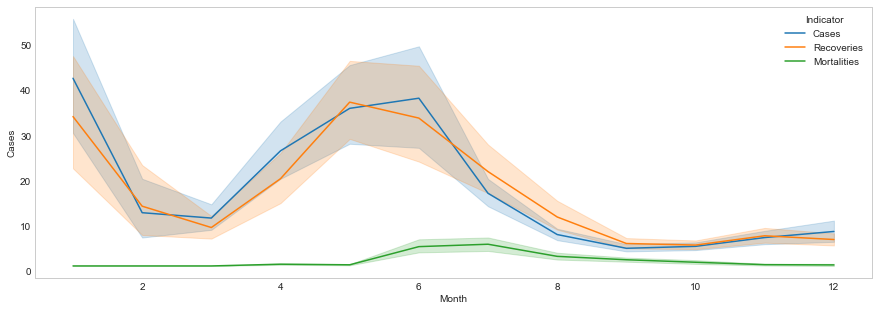

In [40]:
#by month
plt.figure(figsize=(15,5))
sns.lineplot(x='Month', y='Cases', data=df_ruh, hue='Indicator');
#df_ruh

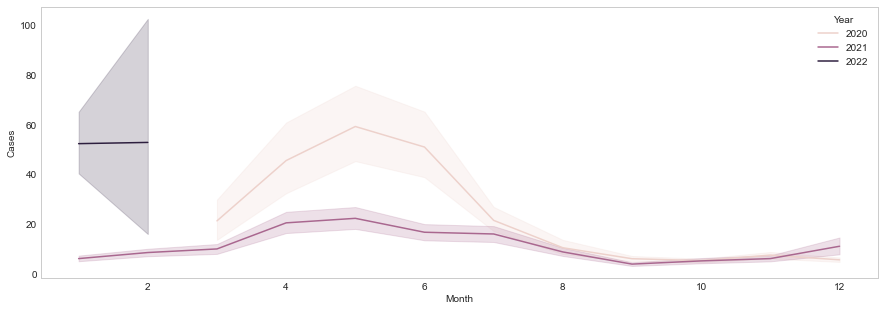

In [41]:
#by year
plt.figure(figsize=(15,5))
sns.lineplot(x='Month', y='Cases', data=df_ruh, hue='Year');
#df_ruh

In [42]:
avrge = re_df_final['y'].mean()
avrge

20.018618240146655

In [43]:
df_r_cases = re_df_final.query('Indicator == "Cases"')
df_r_cases

,ds,y,Indicator
0,2020-03-22,34,Cases
1,2020-03-23,18,Cases
2,2020-03-24,69,Cases
3,2020-04-01,7,Cases
4,2020-04-03,13,Cases
...,...,...,...
15462,2022-02-02,1306,Cases
15463,2022-02-02,2,Cases
15464,2022-02-02,4,Cases
15465,2022-02-02,3,Cases


In [44]:
df_r_cases.dtypes

ds           datetime64[ns]
y                     int64
Indicator            object
dtype: object

In [45]:
df_r_sum_cases = df_r_cases.groupby('ds', as_index=False)['y'].sum()
df_r_sum_cases

,ds,y
0,2020-03-09,1
1,2020-03-13,3
2,2020-03-14,12
3,2020-03-15,2
4,2020-03-16,4
...,...,...
687,2022-01-29,1445
688,2022-01-30,1674
689,2022-01-31,1520
690,2022-02-01,1564


In [46]:
df_r_sum_cases.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [47]:
df_r_sum_cases['7 ma'] = df_r_sum_cases['y'].rolling(7).mean()
df_r_sum_cases

,ds,y,7 ma
0,2020-03-09,1,NaN
1,2020-03-13,3,NaN
2,2020-03-14,12,NaN
3,2020-03-15,2,NaN
4,2020-03-16,4,NaN
...,...,...,...
687,2022-01-29,1445,1626.857143
688,2022-01-30,1674,1626.000000
689,2022-01-31,1520,1601.428571
690,2022-02-01,1564,1588.428571


## Split the data into the train & test 

In [48]:
train = df_r_sum_cases[(df_r_sum_cases['ds']>= pd.to_datetime('2020-03-09'))& (df_r_sum_cases['ds']<= pd.to_datetime('2021-12-31'))]
test = df_r_sum_cases[(df_r_sum_cases['ds']>= pd.to_datetime('2021-12-31'))]
#& (df_r_sum_cases['ds']<= pd.to_datetime('2022-01-30'))

In [49]:
train

,ds,y,7 ma
0,2020-03-09,1,NaN
1,2020-03-13,3,NaN
2,2020-03-14,12,NaN
3,2020-03-15,2,NaN
4,2020-03-16,4,NaN
...,...,...,...
654,2021-12-27,199,146.000000
655,2021-12-28,208,161.285714
656,2021-12-29,215,173.571429
657,2021-12-30,260,190.571429


In [50]:
test

,ds,y,7 ma
658,2021-12-31,249,206.857143
659,2022-01-01,374,241.000000
660,2022-01-02,486,284.428571
661,2022-01-03,888,382.857143
662,2022-01-04,950,488.857143
663,2022-01-05,1023,604.285714
664,2022-01-06,1094,723.428571
665,2022-01-07,935,821.428571
666,2022-01-08,1114,927.142857
667,2022-01-09,1480,1069.142857


In [51]:
train.shape

(659, 3)

In [52]:
test.shape

(34, 3)

## Create and fit the model

In [53]:
model = Prophet(interval_width=0.95, daily_seasonality=True)
model

In [54]:
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [55]:
train.columns

Index(['ds', 'y', '7 ma'], dtype='object')

In [56]:
model.params 

{'k': array([[2.45451003]]),
 'm': array([[-0.00733895]]),
 'delta': array([[-9.13369645e-09, -7.64885574e-09, -2.74462120e-06,
         -4.06477705e+00, -2.12837467e-01, -1.65135370e-08,
          5.25129266e-05,  7.83095301e-01,  7.01221336e-01,
          4.58057176e-01,  8.58140789e-04,  4.75678916e-02,
          1.88493766e-01,  3.36937057e-02,  5.95198003e-04,
          6.90041519e-08, -3.36826964e-09, -4.70610298e-08,
         -1.37741655e-05, -7.35673431e-01, -2.10030367e-06,
         -6.16007779e-07, -2.65856162e-08, -8.81967698e-09,
          4.21884793e-07]]),
 'sigma_obs': array([[0.06679327]]),
 'beta': array([[-4.31016187e-03,  1.29263530e-03,  1.67457355e-03,
         -1.11618662e-03,  7.42262882e-04, -2.08112158e-04,
         -2.97263489e-11, -7.66979080e-03, -5.94526978e-11,
         -7.66979080e-03,  7.35674760e-10, -7.66979080e-03,
         -1.18905396e-10, -7.66979080e-03]]),
 'trend': array([[-0.00733895,  0.00749193,  0.01119965,  0.01490737,  0.01861509,
         

## Forcasting

In [57]:
abs(-6)

6

In [58]:
future= model.make_future_dataframe(periods=120)
forecast= model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-09,-19.147308,-460.230982,253.467423,-19.147308,-19.147308,-78.368407,-78.368407,-78.368407,-80.041937,-80.041937,-80.041937,1.673530,1.673530,1.673530,0.0,0.0,0.0,-97.515715
1,2020-03-13,19.546448,-378.949211,272.118821,19.546448,19.546448,-80.494216,-80.494216,-80.494216,-80.041937,-80.041937,-80.041937,-0.452279,-0.452279,-0.452279,0.0,0.0,0.0,-60.947768
2,2020-03-14,29.219887,-391.254816,273.751951,29.219887,29.219887,-92.880139,-92.880139,-92.880139,-80.041937,-80.041937,-80.041937,-12.838202,-12.838202,-12.838202,0.0,0.0,0.0,-63.660251
3,2020-03-15,38.893327,-377.458593,266.871038,38.893327,38.893327,-91.182201,-91.182201,-91.182201,-80.041937,-80.041937,-80.041937,-11.140264,-11.140264,-11.140264,0.0,0.0,0.0,-52.288875
4,2020-03-16,48.566766,-347.439548,304.291325,48.566766,48.566766,-78.368407,-78.368407,-78.368407,-80.041937,-80.041937,-80.041937,1.673530,1.673530,1.673530,0.0,0.0,0.0,-29.801642


forecast = model.predict(test.drop(columns="y"))
forecast

In [59]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
774,2022-04-26,-165.545213,-694.372622,470.894607
775,2022-04-27,-175.881134,-740.604021,458.720600
776,2022-04-28,-184.256166,-770.334116,455.322286
777,2022-04-29,-185.986148,-739.613942,452.070940
778,2022-04-30,-199.732383,-785.279929,461.688728


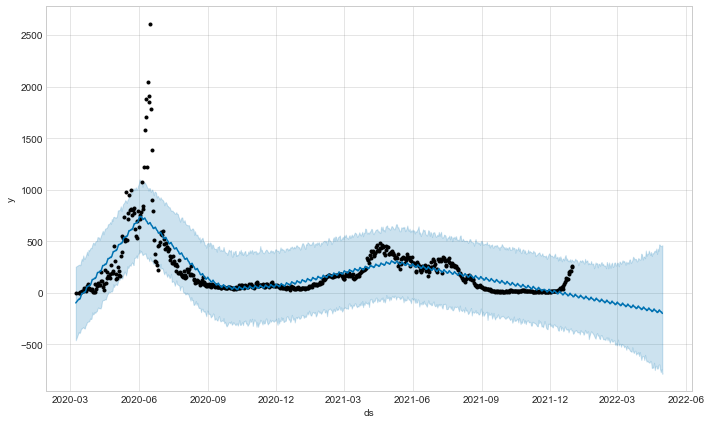

In [60]:
fig1 = model.plot(forecast)

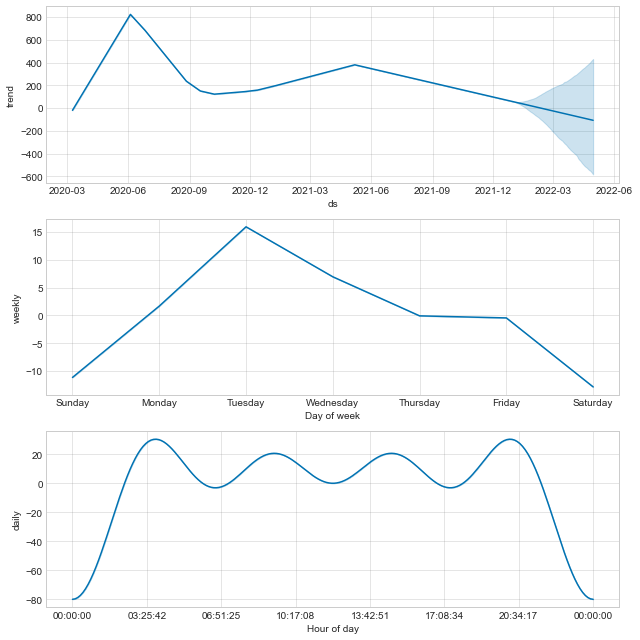

In [61]:
fig2 = model.plot_components(forecast)

In [62]:
cv_results = cross_validation( model = model, initial = '100 days', horizon = '7 days')
df_p = performance_metrics(cv_results)
df_p

INFO:prophet:Making 159 forecasts with cutoffs between 2020-06-19 00:00:00 and 2021-12-24 00:00:00


  0%|          | 0/159 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days 00:00:00,38594.266178,196.454234,129.783990,1.480249,0.952903,1.097259,0.978401
1,1 days 12:00:00,42026.084184,205.002644,131.568957,1.500148,1.060604,1.081467,0.983784
2,2 days 00:00:00,44672.150727,211.357874,135.473565,1.579792,1.091343,1.144287,0.987456
3,2 days 12:00:00,45895.361204,214.232027,140.762413,1.641551,1.034527,1.170532,0.987387
4,3 days 00:00:00,50974.752121,225.775889,140.536386,1.589534,1.216926,1.145007,0.969438
5,3 days 12:00:00,47496.424971,217.936745,138.743452,1.666910,1.038698,1.148280,0.980180
6,4 days 00:00:00,57102.448811,238.961187,140.424645,1.468227,0.878011,1.009683,0.987342
7,4 days 12:00:00,48414.193914,220.032257,143.021090,1.662783,0.878011,1.141500,0.987342
8,5 days 00:00:00,55059.148222,234.646859,148.004533,1.642551,1.025222,1.144618,0.987456
9,5 days 12:00:00,49858.697742,223.290613,146.665374,1.765369,1.068246,1.192651,0.987387


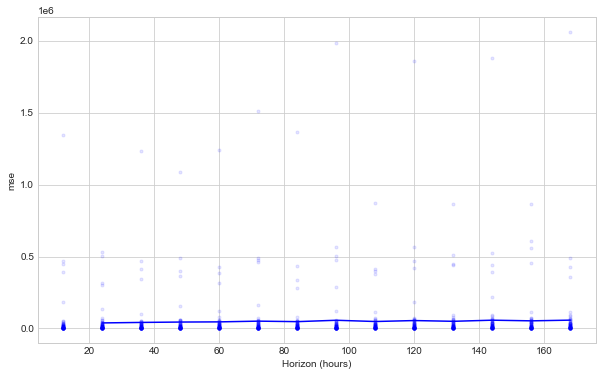

In [63]:
fig3 = plot_cross_validation_metric(cv_results, metric='mse')


## Data Frame for Eastern Region

In [64]:
df_east = df_Daily.query('Region == "Eastern Region"')
df_east

,Daily_Cumulative,Indicator,Date,City,Region,Cases,Year,Month
0,Daily,Cases,2020-03-12,Al Qatif,Eastern Region,3,2020,3
2,Daily,Cases,2020-03-14,Al Hufuf,Eastern Region,1,2020,3
3,Daily,Cases,2020-03-14,Al Qatif,Eastern Region,3,2020,3
7,Daily,Cases,2020-03-16,Al Qatif,Eastern Region,1,2020,3
8,Daily,Cases,2020-03-18,Ad Dammam,Eastern Region,23,2020,3
...,...,...,...,...,...,...,...,...
498470,Daily,Recoveries,2021-05-24,Mulayjah,Eastern Region,13,2021,5
498472,Daily,Recoveries,2021-05-24,Buqayq,Eastern Region,7,2021,5
498500,Daily,Recoveries,2021-05-24,Al Mubarraz,Eastern Region,26,2021,5
498504,Daily,Recoveries,2021-05-24,Al Jafr,Eastern Region,1,2021,5


In [65]:
df_east["City"].value_counts()

Ad Dammam          1588
Al Hufuf           1485
Al Khubar          1227
AdÍH DÍHahran    1226
Al Mubarraz        1180
Al Jubayl          1168
Al Qatif           1160
Hafar Al Batin      995
Buqayq              908
Al Khafji           889
An NuÊ»Ayriyyah     881
Qaryat Al 'Ulya     700
Mulayjah            632
Al Jafr             624
Ras Tannurah        624
SafwaÌ             561
Al Ê»Uyun           462
Al Qaysumah         431
Ê»UrayÊ»Irah        377
BathaÊ¼             359
SalwaÌ             185
As SuÊ»Ayyirah      144
Sayhat               56
Adh Dhibiyyah        46
As Sufairy           27
Ar RuqÊ»I            12
Samudah               4
Harad                 2
Name: City, dtype: int64

In [68]:
df_east['Cases'].value_counts().sum()

17953

### Preprocessing for Data Frame for Eastern Region


In [69]:
east_df_final=df_east.reset_index()[['Date','Cases','Indicator']].rename({'Date':'ds','Cases':'y','Indicator':'Indicator'}, axis='columns')
east_df_final


,ds,y,Indicator
0,2020-03-12,3,Cases
1,2020-03-14,1,Cases
2,2020-03-14,3,Cases
3,2020-03-16,1,Cases
4,2020-03-18,23,Cases
...,...,...,...
17948,2021-05-24,13,Recoveries
17949,2021-05-24,7,Recoveries
17950,2021-05-24,26,Recoveries
17951,2021-05-24,1,Recoveries


In [70]:
pivot_table_year_east = pd.pivot_table(df_east, values='Cases', index=['Year'],
                    columns=['Month'], aggfunc=np.sum, fill_value=0)
pivot_table_year_east

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,0,0,339,4071,24246,46443,58504,19373,11742,5018,4302,1763
2021,2212,3796,4202,7938,8550,11580,13985,6349,474,379,321,1458
2022,33979,3194,0,0,0,0,0,0,0,0,0,0


In [71]:
pivot_table_Indicator_east = pd.pivot_table(df_east, values='Cases', index=['Indicator'],
                    columns=['Month'], aggfunc=np.sum, fill_value=0)
pivot_table_Indicator_east

Month,1,2,3,4,5,6,7,8,9,10,11,12
Indicator,,,,,,,,,,,,
Cases,20670,3662,2687,7634,17022,38006,30606,9100,5275,2394,1387,1693
Mortalities,45,10,21,78,121,222,217,252,135,100,96,71
Recoveries,15476,3318,1833,4297,15653,19795,41666,16370,6806,2903,3140,1457


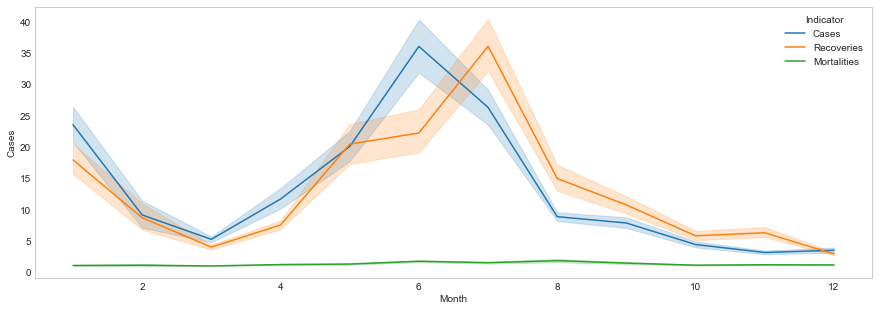

In [72]:
#by month
plt.figure(figsize=(15,5))
sns.lineplot(x='Month', y='Cases', data=df_east, hue='Indicator');
#df_ruh

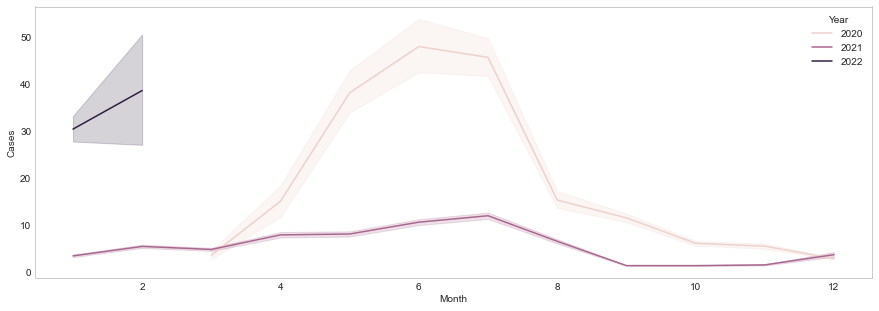

In [73]:
#by year
plt.figure(figsize=(15,5))
sns.lineplot(x='Month', y='Cases', data=df_east, hue='Year');
#df_ruh

In [74]:
avrge = east_df_final['y'].mean()

In [75]:
df_e_cases = df_east.query('Indicator == "Cases"')

In [76]:
east_df_final['7 ma'] = east_df_final['y'].rolling(7).mean()
east_df_final

,ds,y,Indicator,7 ma
0,2020-03-12,3,Cases,NaN
1,2020-03-14,1,Cases,NaN
2,2020-03-14,3,Cases,NaN
3,2020-03-16,1,Cases,NaN
4,2020-03-18,23,Cases,NaN
...,...,...,...,...
17948,2021-05-24,13,Recoveries,11.285714
17949,2021-05-24,7,Recoveries,11.000000
17950,2021-05-24,26,Recoveries,14.428571
17951,2021-05-24,1,Recoveries,14.428571


## Split the datafram for Eastern Region into the train & test as out_simple forcasting

In [77]:
train_e = east_df_final[(east_df_final['ds']>= pd.to_datetime('2020-03-09'))& (east_df_final['ds']<= pd.to_datetime('2021-12-31'))]
test_e = east_df_final[(east_df_final['ds']>= pd.to_datetime('2021-12-31'))]


In [78]:
print(train_e.shape)
print(test_e.shape)

(16743, 4)
(1224, 4)


In [79]:
train_e

,ds,y,Indicator,7 ma
0,2020-03-12,3,Cases,NaN
1,2020-03-14,1,Cases,NaN
2,2020-03-14,3,Cases,NaN
3,2020-03-16,1,Cases,NaN
4,2020-03-18,23,Cases,NaN
...,...,...,...,...
17948,2021-05-24,13,Recoveries,11.285714
17949,2021-05-24,7,Recoveries,11.000000
17950,2021-05-24,26,Recoveries,14.428571
17951,2021-05-24,1,Recoveries,14.428571


## Create and fit the model for Eastern Region

In [80]:
model_e = Prophet(interval_width=0.95, daily_seasonality=True)
model_e

In [81]:
model_e.fit(train_e)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [82]:
model_e.params 

{'k': array([[0.40897751]]),
 'm': array([[0.00138047]]),
 'delta': array([[-1.69857221e-01,  1.39009537e-01, -1.52027028e-01,
         -8.35341400e-01, -1.93314834e-01,  1.55296373e-01,
          3.46809758e-01,  2.41887580e-01, -2.99822700e-05,
         -1.34451934e-06,  3.16999240e-03,  1.00968957e-02,
          7.11014989e-04,  5.87396174e-02,  1.00127027e-02,
          6.23236955e-05,  5.54607823e-04,  5.95132463e-03,
          8.32281620e-04, -1.12403017e-04,  9.16462608e-05,
          2.85056532e-05, -8.01023798e-07, -2.63008849e-05,
         -7.61219982e-02]]),
 'sigma_obs': array([[0.03514095]]),
 'beta': array([[-8.57400413e-04, -2.00810134e-04, -1.79208561e-04,
          6.35645821e-04, -2.96244109e-04,  1.48208066e-05,
          1.40634171e-10, -1.67854768e-03,  2.81268343e-10,
         -1.67854768e-03,  5.95257952e-10, -1.67854768e-03,
          5.62536685e-10, -1.67854768e-03]]),
 'trend': array([[0.00138047, 0.00199826, 0.00323384, ..., 0.00558126, 0.00558126,
         0

## forecast for Eastern Region

In [83]:
future_e= model_e.make_future_dataframe(periods=120)
forecast_e= model_e.predict(future_e)
forecast_e.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-09,1.352859,-67.468896,63.039581,1.352859,1.352859,-5.507138,-5.507138,-5.507138,-6.579907,-6.579907,-6.579907,1.072769,1.072769,1.072769,0.0,0.0,0.0,-4.154279
1,2020-03-10,1.958294,-71.383297,61.464690,1.958294,1.958294,-6.572299,-6.572299,-6.572299,-6.579907,-6.579907,-6.579907,0.007608,0.007608,0.007608,0.0,0.0,0.0,-4.614005
2,2020-03-12,3.169164,-69.991372,64.668710,3.169164,3.169164,-6.139244,-6.139244,-6.139244,-6.579907,-6.579907,-6.579907,0.440663,0.440663,0.440663,0.0,0.0,0.0,-2.970079
3,2020-03-13,3.774599,-68.868330,57.670973,3.774599,3.774599,-7.808429,-7.808429,-7.808429,-6.579907,-6.579907,-6.579907,-1.228522,-1.228522,-1.228522,0.0,0.0,0.0,-4.033830
4,2020-03-14,4.380034,-66.767082,61.521843,4.380034,4.380034,-7.604308,-7.604308,-7.604308,-6.579907,-6.579907,-6.579907,-1.024401,-1.024401,-1.024401,0.0,0.0,0.0,-3.224273


In [84]:
forecast_e[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
777,2022-04-26,-8.761747,-97.689751,77.024109
778,2022-04-27,-8.155660,-97.013183,80.113306
779,2022-04-28,-8.460744,-102.029253,77.571679
780,2022-04-29,-10.195956,-101.121950,81.661513
781,2022-04-30,-10.057861,-108.622803,83.173598


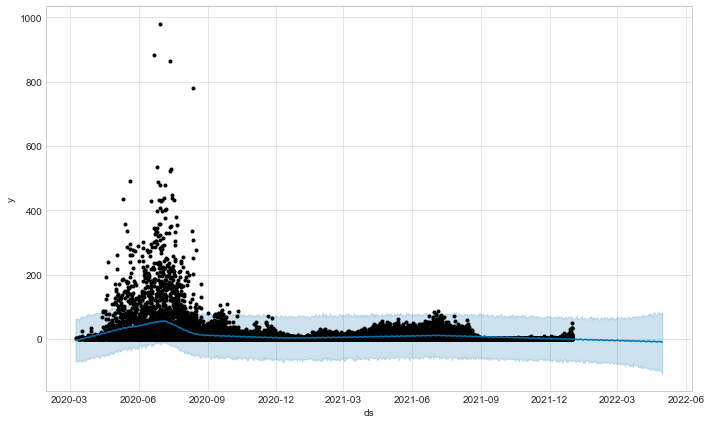

In [85]:
fig1_e = model_e.plot(forecast_e)

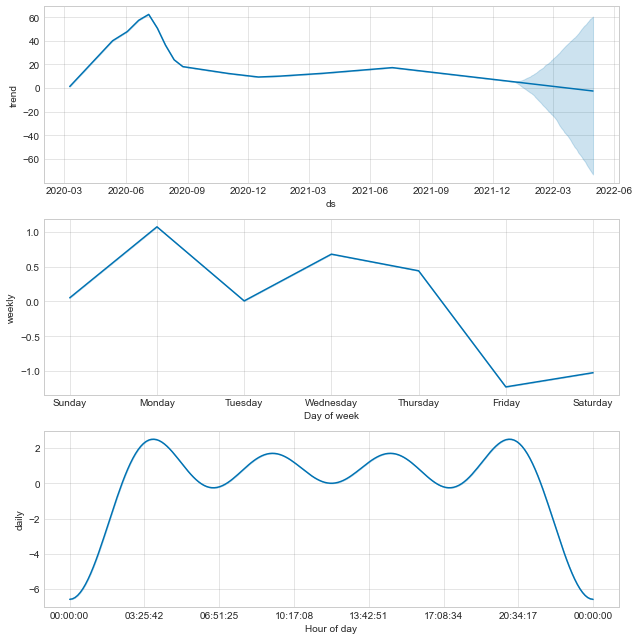

In [86]:
fig2_e = model_e.plot_components(forecast_e)

In [87]:
cv_e_results = cross_validation( model = model_e, initial = '120 days', horizon = '7 days')
df_p_e = performance_metrics(cv_e_results)
df_p_e

INFO:prophet:Making 153 forecasts with cutoffs between 2020-07-10 00:00:00 and 2021-12-24 00:00:00


  0%|          | 0/153 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days 00:00:00,420.514934,20.506461,9.174195,2.495493,0.926902,0.990049,0.997140
1,1 days 12:00:00,674.730801,25.975581,9.731626,2.689122,0.975734,0.961286,0.996483
2,2 days 00:00:00,522.764776,22.864050,9.800690,2.953202,1.110309,0.947606,0.995804
3,2 days 12:00:00,379.970050,19.492820,9.481566,2.829335,0.905285,0.930725,0.996656
4,3 days 00:00:00,708.406321,26.615904,10.692744,3.475869,1.448299,0.981383,0.995987
5,3 days 12:00:00,453.609496,21.298110,9.480429,2.761617,1.102678,1.134312,0.997275
6,4 days 00:00:00,479.065112,21.887556,9.496204,2.544156,1.030410,1.006766,0.997003
7,4 days 12:00:00,393.725073,19.842507,8.986534,2.437686,0.876409,1.046195,0.997947
8,5 days 00:00:00,666.448264,25.815659,9.771773,2.699021,0.930015,0.990384,0.997121
9,5 days 12:00:00,468.941265,21.655052,9.365030,2.877297,0.885952,0.954542,0.997297


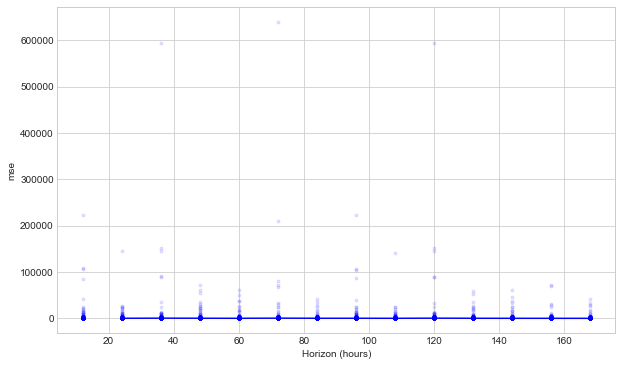

In [ ]:
fig3_e = plot_cross_validation_metric(cv_e_results, metric='mse')

## Data Frame for Makkah Almukaramh Region

In [89]:
df_mk = df_Daily.query('Region == "Makkah Al Mukarramah"')
df

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Daily,Cases,2020-03-12,NaN,Al Qatif,Eastern Region,3
1,Daily,Cases,2020-03-13,NaN,Makkah Al Mukarramah,Makkah Al Mukarramah,26
2,Daily,Cases,2020-03-14,NaN,Al Hufuf,Eastern Region,1
3,Daily,Cases,2020-03-14,NaN,Al Qatif,Eastern Region,3
4,Daily,Cases,2020-03-15,International flights suspension for 14 days,Jeddah,Makkah Al Mukarramah,2
...,...,...,...,...,...,...,...
533399,Cumulative,Tested,2022-01-10,NaN,Total,Total,34567571
533400,Cumulative,Tested,2022-01-12,NaN,Total,Total,34885540
533401,Cumulative,Tested,2022-01-13,NaN,Total,Total,35050746
533402,Cumulative,Tested,2022-01-14,NaN,Total,Total,35198422


In [90]:
df_mk["City"].value_counts()

Jeddah                  1864
Makkah Al Mukarramah    1774
At TaÊ¼If               1499
Al Qunfudhah             808
Al Lith                  693
Khulays                  660
Al Kamil                 587
Adam                     566
Al Khurmah               556
Al MudÍHaylif           547
Turuba                   476
Rabigh                   421
Al Muwayh                400
Ranyah                   371
Al Qari'                 336
Thurayban                294
Al Gouz                  293
Numarah                  269
Umm Ad Dawm              257
Al Sehen                 235
Qiya                     233
DÍHalm                  213
Thuwal                   213
Maysan                   205
Al Mahani                174
Abu 'Urwah                32
Al Hada                   29
Hadda                     29
Al Hadban                  7
Hadad Bani Malik           2
Name: City, dtype: int64

In [91]:
df_mk['Cases'].value_counts().sum()

14043

### Preprocessing for Data Frame for Makkah Almukaramah Region


In [92]:
mk_df_final=df_mk.reset_index()[['Date','Cases','Indicator']].rename({'Date':'ds','Cases':'y','Indicator':'Indicator'}, axis='columns')
mk_df_final


,ds,y,Indicator
0,2020-03-13,26,Cases
1,2020-03-15,2,Cases
2,2020-03-16,5,Cases
3,2020-03-18,13,Cases
4,2020-03-19,1,Cases
...,...,...,...
14038,2021-05-24,109,Recoveries
14039,2021-05-24,3,Recoveries
14040,2021-05-24,4,Recoveries
14041,2021-05-25,115,Recoveries


In [93]:
avrge = mk_df_final['y'].mean()

In [94]:
df_m_cases = df_mk.query('Indicator == "Cases"')
df_m_cases

,Daily_Cumulative,Indicator,Date,City,Region,Cases,Year,Month
1,Daily,Cases,2020-03-13,Makkah Al Mukarramah,Makkah Al Mukarramah,26,2020,3
4,Daily,Cases,2020-03-15,Jeddah,Makkah Al Mukarramah,2,2020,3
6,Daily,Cases,2020-03-16,Jeddah,Makkah Al Mukarramah,5,2020,3
9,Daily,Cases,2020-03-18,Jeddah,Makkah Al Mukarramah,13,2020,3
10,Daily,Cases,2020-03-19,Jeddah,Makkah Al Mukarramah,1,2020,3
...,...,...,...,...,...,...,...,...
378914,Daily,Cases,2022-02-02,Al Qunfudhah,Makkah Al Mukarramah,9,2022,2
378916,Daily,Cases,2022-02-02,Turuba,Makkah Al Mukarramah,6,2022,2
378926,Daily,Cases,2022-02-02,Maysan,Makkah Al Mukarramah,5,2022,2
378932,Daily,Cases,2022-02-02,Abu 'Urwah,Makkah Al Mukarramah,12,2022,2


## Split the datafram for Makkah Almukaramah Region into the train & test as out_simple forcasting

In [95]:
mk_df_final['7 ma'] = mk_df_final['y'].rolling(7).mean()
mk_df_final

,ds,y,Indicator,7 ma
0,2020-03-13,26,Cases,NaN
1,2020-03-15,2,Cases,NaN
2,2020-03-16,5,Cases,NaN
3,2020-03-18,13,Cases,NaN
4,2020-03-19,1,Cases,NaN
...,...,...,...,...
14038,2021-05-24,109,Recoveries,29.571429
14039,2021-05-24,3,Recoveries,25.857143
14040,2021-05-24,4,Recoveries,26.142857
14041,2021-05-25,115,Recoveries,42.142857


In [96]:
train_m = mk_df_final[(mk_df_final['ds']>= pd.to_datetime('2020-03-09'))& (mk_df_final['ds']<= pd.to_datetime('2021-12-31'))]
test_m = mk_df_final[(mk_df_final['ds']>= pd.to_datetime('2021-12-31'))]


In [97]:
print(train_m.shape)
print(test_m.shape)

(12729, 4)
(1330, 4)


## Create and fit the model for Makkah Almukaramh Region

In [98]:
model_m = Prophet(interval_width=0.95, daily_seasonality=True)
model_m

In [99]:
model_m.fit(train_m)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


## forecast for Makkah Almukaramh Region

In [100]:
future_m= model_m.make_future_dataframe(periods=120)
forecast_m= model_m.predict(future_m)
forecast_m.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-10,0.252390,-117.103458,119.216750,0.252390,0.252390,-4.185363,-4.185363,-4.185363,-2.969861,-2.969861,-2.969861,-1.215502,-1.215502,-1.215502,0.0,0.0,0.0,-3.932973
1,2020-03-11,1.705387,-117.612469,109.565202,1.705387,1.705387,-2.897223,-2.897223,-2.897223,-2.969861,-2.969861,-2.969861,0.072638,0.072638,0.072638,0.0,0.0,0.0,-1.191836
2,2020-03-12,3.158384,-111.200870,120.609869,3.158384,3.158384,-3.134792,-3.134792,-3.134792,-2.969861,-2.969861,-2.969861,-0.164931,-0.164931,-0.164931,0.0,0.0,0.0,0.023591
3,2020-03-13,4.611381,-111.468081,119.123536,4.611381,4.611381,-2.579270,-2.579270,-2.579270,-2.969861,-2.969861,-2.969861,0.390591,0.390591,0.390591,0.0,0.0,0.0,2.032110
4,2020-03-14,6.064377,-106.206182,116.600516,6.064377,6.064377,-3.675585,-3.675585,-3.675585,-2.969861,-2.969861,-2.969861,-0.705724,-0.705724,-0.705724,0.0,0.0,0.0,2.388792


In [101]:
forecast_m.to_csv('makkah1.csv',index=False)

In [102]:
forecast_m[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
777,2022-04-26,-8.314986,-133.454221,122.335410
778,2022-04-27,-7.107795,-136.015073,122.919605
779,2022-04-28,-7.426314,-135.037515,123.657543
780,2022-04-29,-6.951741,-140.308229,120.591894
781,2022-04-30,-8.129006,-143.590302,114.229553


In [103]:
df_mk.to_csv('makkah.csv',index=False)

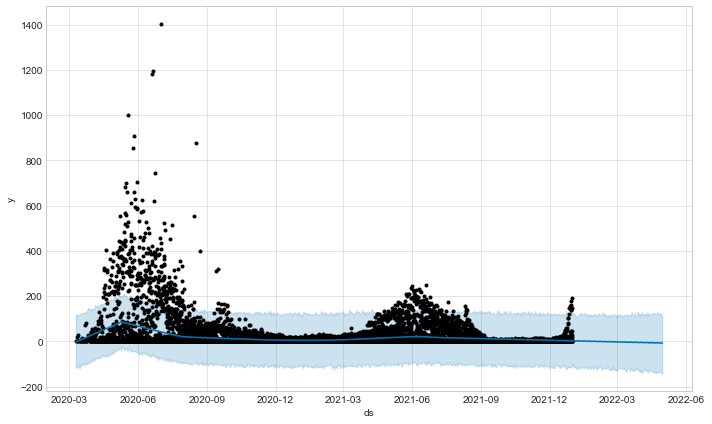

In [104]:
fig1_m = model_m.plot(forecast_m)

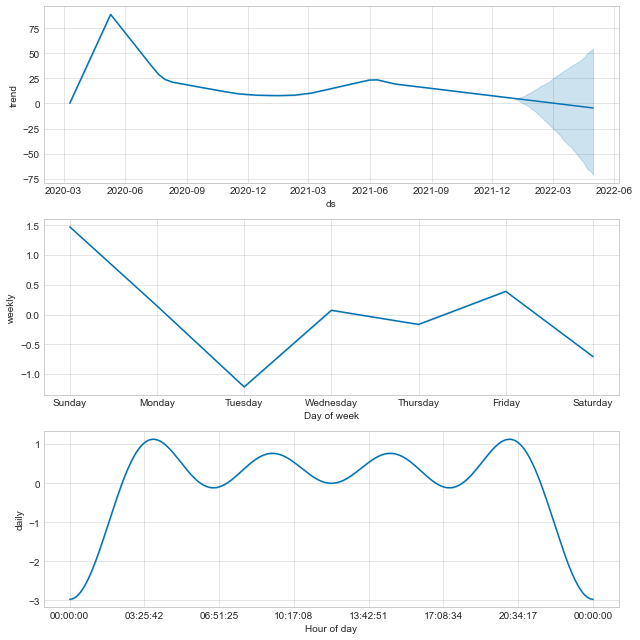

In [105]:
fig2_m = model_m.plot_components(forecast_m)

In [106]:
cv_m_results = cross_validation( model = model_m, initial = '120 days', horizon = '7 days')
df_p_m = performance_metrics(cv_m_results)
df_p_m

INFO:prophet:Making 153 forecasts with cutoffs between 2020-07-10 00:00:00 and 2021-12-24 00:00:00


  0%|          | 0/153 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days 00:00:00,1008.674651,31.759639,16.515969,4.799300,2.308812,1.236464,0.993079
1,1 days 12:00:00,916.611272,30.275589,16.293341,4.959774,2.510085,1.217140,0.994332
2,2 days 00:00:00,1107.935926,33.285671,18.392757,5.890229,2.951928,1.268531,0.991455
3,2 days 12:00:00,1118.066247,33.437498,17.485183,5.123863,2.251420,1.231365,0.989533
4,3 days 00:00:00,1364.928532,36.944939,17.176506,5.013199,2.508426,1.229416,0.991436
5,3 days 12:00:00,1013.081037,31.828934,16.693709,5.260486,2.508426,1.236915,0.993324
6,4 days 00:00:00,846.160990,29.088846,16.044430,4.655696,1.808195,1.252646,0.993521
7,4 days 12:00:00,981.792351,31.333566,16.128169,4.648838,1.811985,1.228213,0.992774
8,5 days 00:00:00,926.938180,30.445659,16.290797,4.895533,2.073568,1.220138,0.993849
9,5 days 12:00:00,1063.499703,32.611343,17.884714,5.643994,3.283527,1.263114,0.991668


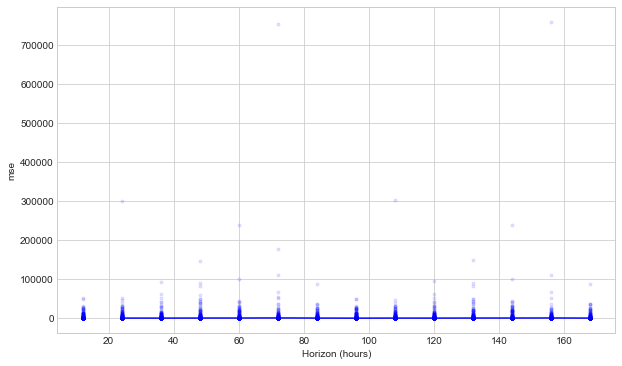

In [109]:
fig3_m = plot_cross_validation_metric(cv_m_results, metric='mse')


In [142]:
import pandas as pd

In [143]:
r_df = pd.read_csv('Riyadh12.csv')
e_df = pd.read_csv('Eastren12.csv')
m_df = pd.read_csv('makkah12.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Riyadh12.csv'

In [144]:
forecast_r = r_df[['ds','yhat','yhat_lower','yhat_upper']]
forecast_e = e_df[['ds','yhat','yhat_lower','yhat_upper']]
forecast_m = m_df[['ds','yhat','yhat_lower','yhat_upper']]

NameError: name 'r_df' is not defined

In [145]:
forecast_r

NameError: name 'forecast_r' is not defined

In [146]:
px.line(forecast, x="ds", y="yhat_upper", title='Future cases for Riyadh', height=500, template="plotly_dark")

NameError: name 'forecast_r' is not defined

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import dcc 
from dash import html
from dash.dependencies import Input, Output

In [148]:
import dash
import dash_bootstrap_components as dbc

In [149]:
Region_names = df_Daily.Region.unique()
Region_names.sort()
Region_names

array(['Al Bahah', 'Al Jawf', 'Al Madinah Al Munawwarah', 'Al Qaseem',
       'Ar Riyad', 'Aseer', 'Eastern Region', 'Hail', 'Jazan',
       'Makkah Al Mukarramah', 'Najran', 'Northern Borders', 'Tabuk'],
      dtype=object)

In [ ]:
external_stylesheets = [
    # Bootswatch theme
    dbc.themes.SLATE,
    # for social media icons
    "https://use.fontawesome.com/releases/v5.9.0/css/all.css",
]


app = dash.Dash(__name__,
    external_stylesheets=external_stylesheets,
    routes_pathname_prefix='/',
)

row_1 = dbc.Row(
    [
        dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                    dcc.Dropdown(
                    id='Dropdown2', 
                    clearable=False,
                    options=[{"label": x, "value": x} for x in Region_names],
                    value=Region_names[0],  
                    style={'font-size':20, 'width': '2500px', 'height': '60px',"background-color":"gray",
                            'font-color':'black','color':'black',
                             'verticalAlign':"middle"}
                    ),
                        style={'height':'40px',
                               'margin-left':  '0px',
                               'font-size': '10px'}
                    )),
                width=3           
        ),
        
        dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                        [
                            html.H1(id="item-cases", className="mt-3", style={'color':'white', 'font-size':35}),
                            html.P(
                                f"{'Cases'}",
                                className="card-text",
                                style={'color':'white', 'font-size':15}
                            ),
                        ],
                    ),
                    className=f"top-bar-card-{'Cases'}",
                ),
                className="top-bar-card-body",
                width=3,
                style={'color':'yellow'}
            ),
        dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                        [
                            html.H1(id="item-recoveries", className=f"top-bar-value-{'Recoveries'}" , 
                                    style={'color':'yellow', 'font-size':35}),
                            html.P(
                                f"{'Recoveries'}",
                                className="card-text",
                                style={'color':'yellow', 'font-size':15}
                            ),
                        ]
                    ),
                    className=f"top-bar-card-{'Recoveries'}",
                ),
                width=3,
                className="top-bar-card-body",
            ),
        dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                        [   html.H1(id="item-mortalities", className=f"top-bar-value-{'Mortalities'}" , 
                                    style={'color':'red', 'font-size':35}),
                            html.P('Mortalities', className="card-text", style={'color':'red', 'font-size':15}),
                            
                        ]
                    ),
                    className=f"top-bar-card-{'Mortalities'}",
                ),
                width=3,
                className="top-bar-card-body",
            )
    ],
    className="mb-4",
)


fig_r = px.line(forecast, x="ds", y="yhat_upper", title='Future cases for Riyadh', height=300, template='plotly_dark')
fig_r.update_layout(font=dict(family="Courier New, monospace",size=15,color="white"))
fig_e = px.line(forecast_e, x="ds", y="yhat_upper", title='Future cases for Eastern Region', height=300, template='plotly_dark')
fig_e.update_layout(font=dict(family="Courier New, monospace",size=15,color="white"))
fig_m = px.line(forecast_m, x="ds", y="yhat_upper", title='Future cases for Makkah', height=300, template='plotly_dark')
fig_m.update_layout(font=dict(family="Courier New, monospace",size=15,color="white"))

row_2 = dbc.Row(
    [
        dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                    dcc.Graph(figure=fig_r)
                    )),
                width=4           
        ),
        
        dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                    dcc.Graph(figure=fig_e)
                    ),
                ),
                width=4,
            ),
        dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                    dcc.Graph(figure=fig_m)
                    ),
                ),
                width=4,
            )
        
    ]
)

app.layout = html.Div([dbc.Alert(
    html.Div([
        html.H1("Covid-19 Tracker fo Saudi Arabia", style={'color':'white', 'font-size':40})
    ]), color='black', style={'height':30}
    ),
                                               html.Br(),
          
    html.Div(row_1),
    
    html.Div([                  
    html.Br([]),
       ]),
    dcc.Graph(id="LineGraph", style={'color':'#F4F4F4'}), 
    html.Br([]),
    html.Br([]),
    html.Div(row_2),
    html.Br([]),                   
                      ])

@app.callback(
    Output("item-cases", "children"), [Input("Dropdown2", "value")]
   )
def count_cases(region):
    n = df_Daily[(df_Daily['Indicator']=='Cases') & (df_Daily['Region']==region)]['Cases'].sum()
    return str(n)

@app.callback(
    Output("item-recoveries", "children"), [Input("Dropdown2", "value")]
   )
def count_cases(region):
    n = df_Daily[(df_Daily['Indicator']=='Recoveries') & (df_Daily['Region']==region)]['Cases'].sum()
    return str(n)

@app.callback(
    Output("item-mortalities", "children"), [Input("Dropdown2", "value")]
   )
def count_cases(region):
    n = df_Daily[(df_Daily['Indicator']=='Mortalities') & (df_Daily['Region']==region)]['Cases'].sum()
    return str(n)

@app.callback(
    Output("LineGraph", "figure"), 
    [Input("Dropdown2", "value")])
def update_line_chart(regionss):
    df2 = df_Daily[df_Daily['Region']==regionss]
    df2 = df2.groupby('Date')['Cases'].sum().reset_index()
    fig = px.line(df2, x="Date", y="Cases", title='Daily cases for ' + regionss, height=350, template='plotly_dark')
    
    fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="white"))
    return fig

if __name__ == "__main__":
    app.run_server()


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:20] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:20] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:21] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:21] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:21] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:21] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:21] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:21] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Feb/2022 16:26:21] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127

In [140]:
df_Daily[df_Daily['Region']=='Ar Riyad']

,Daily_Cumulative,Indicator,Date,City,Region,Cases,Year,Month
16,Daily,Cases,2020-03-22,Ar Riyad,Ar Riyad,34,2020,3
18,Daily,Cases,2020-03-23,Ar Riyad,Ar Riyad,18,2020,3
21,Daily,Cases,2020-03-24,Ar Riyad,Ar Riyad,69,2020,3
41,Daily,Cases,2020-04-01,Ar Riyad,Ar Riyad,7,2020,4
48,Daily,Cases,2020-04-03,Ar Riyad,Ar Riyad,13,2020,4
...,...,...,...,...,...,...,...,...
498492,Daily,Recoveries,2021-05-24,Ad DirÊ»Iyyah,Ar Riyad,5,2021,5
498494,Daily,Recoveries,2021-05-24,Al Kharj,Ar Riyad,12,2021,5
498498,Daily,Recoveries,2021-05-24,Wuthaylan,Ar Riyad,1,2021,5
498516,Daily,Recoveries,2021-05-25,Al MajmaÊ»Ah,Ar Riyad,2,2021,5
